In [37]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
#import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [38]:
#from sklearn.metrics import plot_confusion_matrix


In [39]:
#pip uninstall scikit-learn

In [40]:
data = pd.read_csv('initial_data.csv')  
data

,userid,age,gender,activity_period,td_os,td_browser,td_language,brand,occupation,url,title,description,source,channels,medium,gender_age,activity_percentile,ad_response_percentile,time
0,4hWoYqtosMp6,40-60,NaN,evening,mobile,mobile,en,swift,others,https://www.marutisuzuki.com/swift?form=testdr...,"maruti suzuki 2021 swift : car features, speci...",maruti suzuki 2021 swift is available in 9 exc...,google,paid search,cpc,NA40-60,"[""evening:95""]","[""google:95""]",1653983228
1,4hWoYqtosMp6,40-60,NaN,evening,mobile,mobile,en,dzire,others,https://www.marutisuzuki.com/dzire?form=testdr...,"maruti suzuki dzire : dzire features, specific...",maruti suzuki dzire is available in 6 exciting...,google,paid search,cpc,NA40-60,"[""evening:95""]","[""google:95""]",1653983228
2,4hWoYqtosMp6,40-60,NaN,evening,mobile,mobile,en,s-cross,others,https://www.nexaexperience.com/s-cross?utm_for...,"maruti suzuki new s-cross: car price, models &...",check out the new maruti suzuki s-cross car pr...,google,paid search,cpc,NA40-60,"[""evening:95""]","[""google:95""]",1653983228
3,TCCZuvdZZJF6,40-60,NaN,evening,mobile,mobile,en,ertiga,service/salaried,https://www.marutisuzuki.com/ertiga?form=testd...,maruti suzuki new ertiga 2022: upcoming ertiga...,pre booking opens for maruti suzuki new ertiga...,google,paid search,cpc,NA40-60,"[""evening:97""]","[""google:84""]",1653983228
4,TCCZuvdZZJF6,40-60,NaN,evening,mobile,mobile,en,brand,service/salaried,https://www.marutisuzukitruevalue.com/?utm_sou...,buy & sell pre-owned maruti suzuki cars in ind...,maruti suzuki true value is india's most-visit...,google,paid search,cpc,NA40-60,"[""evening:97""]","[""google:84""]",1653983228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,dQVo55UBfxzn,30-40,NaN,afternoon,mac,desktop,en,brand,service/salaried,https://www.nexaofmalakpet.com/book-a-test-dri...,"book a test drive with nexa in kukatpally, hyd...",book a test drive by filling in the required d...,gmb,direct,organic,NA30-40,"[""afternoon:83""]","[""gmb:98""]",1653983228
99996,BfRbDcjVR6x6,18-30,NaN,afternoon,mobile,mobile,en,brand,business,https://www.marutisuzukitruevalue.com/buy-car/...,buy used maruti suzuki wagon r 2020 petrol in ...,buy true value certified used maruti suzuki wa...,facebook,social,social,NA18-30,"[""afternoon:86""]","[""facebook:98""]",1653983228
99997,BfRbDcjVR6x6,18-30,NaN,afternoon,mobile,mobile,en,ertiga,business,https://www.marutisuzukitruevalue.com/buy-car/...,buy used maruti suzuki ertiga 2016 diesel in a...,buy true value certified used maruti suzuki er...,facebook,social,social,NA18-30,"[""afternoon:86""]","[""facebook:98""]",1653983228
99998,BfRbDcjVR6x6,18-30,NaN,afternoon,mobile,mobile,en,dzire,business,https://www.marutisuzukitruevalue.com/buy-car/...,buy used maruti suzuki dzire 2011 diesel in ma...,buy true value certified used maruti suzuki dz...,facebook,social,social,NA18-30,"[""afternoon:86""]","[""facebook:98""]",1653983228


In [41]:
data['age'].replace('60plus', '60-100', inplace=True)
data.age.unique()

array(['40-60', '30-40', '18-30', '60-100'], dtype=object)

In [42]:
data.head()


,userid,age,gender,activity_period,td_os,td_browser,td_language,brand,occupation,url,title,description,source,channels,medium,gender_age,activity_percentile,ad_response_percentile,time
0,4hWoYqtosMp6,40-60,NaN,evening,mobile,mobile,en,swift,others,https://www.marutisuzuki.com/swift?form=testdr...,"maruti suzuki 2021 swift : car features, speci...",maruti suzuki 2021 swift is available in 9 exc...,google,paid search,cpc,NA40-60,"[""evening:95""]","[""google:95""]",1653983228
1,4hWoYqtosMp6,40-60,NaN,evening,mobile,mobile,en,dzire,others,https://www.marutisuzuki.com/dzire?form=testdr...,"maruti suzuki dzire : dzire features, specific...",maruti suzuki dzire is available in 6 exciting...,google,paid search,cpc,NA40-60,"[""evening:95""]","[""google:95""]",1653983228
2,4hWoYqtosMp6,40-60,NaN,evening,mobile,mobile,en,s-cross,others,https://www.nexaexperience.com/s-cross?utm_for...,"maruti suzuki new s-cross: car price, models &...",check out the new maruti suzuki s-cross car pr...,google,paid search,cpc,NA40-60,"[""evening:95""]","[""google:95""]",1653983228
3,TCCZuvdZZJF6,40-60,NaN,evening,mobile,mobile,en,ertiga,service/salaried,https://www.marutisuzuki.com/ertiga?form=testd...,maruti suzuki new ertiga 2022: upcoming ertiga...,pre booking opens for maruti suzuki new ertiga...,google,paid search,cpc,NA40-60,"[""evening:97""]","[""google:84""]",1653983228
4,TCCZuvdZZJF6,40-60,NaN,evening,mobile,mobile,en,brand,service/salaried,https://www.marutisuzukitruevalue.com/?utm_sou...,buy & sell pre-owned maruti suzuki cars in ind...,maruti suzuki true value is india's most-visit...,google,paid search,cpc,NA40-60,"[""evening:97""]","[""google:84""]",1653983228


In [43]:
df=data.drop(['userid','title','url','description'],axis=1)
df


,age,gender,activity_period,td_os,td_browser,td_language,brand,occupation,source,channels,medium,gender_age,activity_percentile,ad_response_percentile,time
0,40-60,NaN,evening,mobile,mobile,en,swift,others,google,paid search,cpc,NA40-60,"[""evening:95""]","[""google:95""]",1653983228
1,40-60,NaN,evening,mobile,mobile,en,dzire,others,google,paid search,cpc,NA40-60,"[""evening:95""]","[""google:95""]",1653983228
2,40-60,NaN,evening,mobile,mobile,en,s-cross,others,google,paid search,cpc,NA40-60,"[""evening:95""]","[""google:95""]",1653983228
3,40-60,NaN,evening,mobile,mobile,en,ertiga,service/salaried,google,paid search,cpc,NA40-60,"[""evening:97""]","[""google:84""]",1653983228
4,40-60,NaN,evening,mobile,mobile,en,brand,service/salaried,google,paid search,cpc,NA40-60,"[""evening:97""]","[""google:84""]",1653983228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,30-40,NaN,afternoon,mac,desktop,en,brand,service/salaried,gmb,direct,organic,NA30-40,"[""afternoon:83""]","[""gmb:98""]",1653983228
99996,18-30,NaN,afternoon,mobile,mobile,en,brand,business,facebook,social,social,NA18-30,"[""afternoon:86""]","[""facebook:98""]",1653983228
99997,18-30,NaN,afternoon,mobile,mobile,en,ertiga,business,facebook,social,social,NA18-30,"[""afternoon:86""]","[""facebook:98""]",1653983228
99998,18-30,NaN,afternoon,mobile,mobile,en,dzire,business,facebook,social,social,NA18-30,"[""afternoon:86""]","[""facebook:98""]",1653983228


In [44]:
df.activity_period.unique()

array(['evening', 'overnight', 'afternoon', 'morning'], dtype=object)

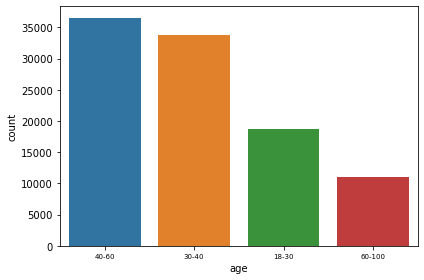

In [45]:
#from sklearn.preprocessing import LabelEncoder
import seaborn as sns
# Creating an instance of LabelEncoder
#label_encoder = LabelEncoder()
#activity_period = ['evening', 'overnight', 'afternoon', 'morning']
#td_os = ['mobile', 'windows', 'linux', 'mac', 'other']
#td_browser = ['mobile', 'desktop']
df
ax = sns.countplot(x="age", data=df)

ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
plt.tight_layout()
plt.show()

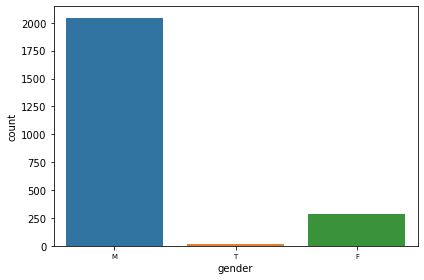

In [46]:
df
ax = sns.countplot(x="gender", data=df)

ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
plt.tight_layout()
plt.show()

In [47]:
from sklearn import preprocessing
  
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['activity_period']= label_encoder.fit_transform(df['activity_period'])
df['td_os']= label_encoder.fit_transform(df['td_os'])
df['td_browser']= label_encoder.fit_transform(df['td_browser'])
df['td_language']= label_encoder.fit_transform(df['td_language'])
df['brand']= label_encoder.fit_transform(df['brand'])
df['occupation']= label_encoder.fit_transform(df['occupation'])
#df['description']= label_encoder.fit_transform(df['description'])
df['source']= label_encoder.fit_transform(df['source'])
df['channels']= label_encoder.fit_transform(df['channels'])
df['medium']= label_encoder.fit_transform(df['medium'])
df['activity_percentile']= label_encoder.fit_transform(df['activity_percentile'])
df['ad_response_percentile']= label_encoder.fit_transform(df['ad_response_percentile'])
df['gender']= label_encoder.fit_transform(df['gender'])
df['age']= label_encoder.fit_transform(df['age'])
df['gender_age']= label_encoder.fit_transform(df['gender_age'])

#df['activity_period'].unique()

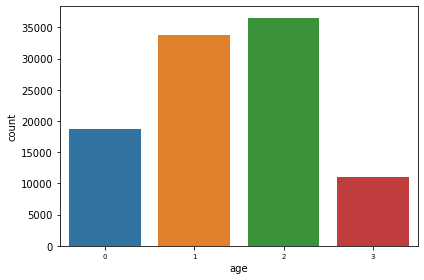

In [48]:
#encoded_activity_period = label_encoder.fit_transform(activity_period)
#encoencoded_activity_period = label_encoder.fit_transform(td_os)
#ded_activity_period = label_encoder.fit_transform(td_browser)

# Printing the encoded values
#encoded_activity_period
#encoencoded_activity_period
#ded_activity_period
df
ax = sns.countplot(x="age", data=df)

ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
plt.tight_layout()
plt.show()

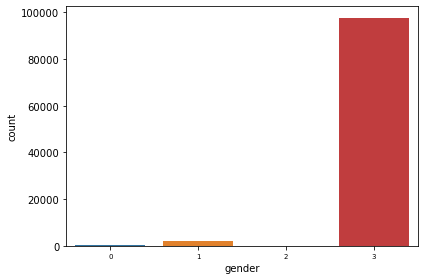

In [49]:
df
ax = sns.countplot(x="gender", data=df)

ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
plt.tight_layout()
plt.show()

In [50]:
X = df.drop(['age', 'gender'], axis=1)  # Assuming 'age' and 'gender' are the target variables
y_age = df['age']
y_gender = df['gender']

In [51]:
X_train, X_test, y_age_train, y_age_test, y_gender_train, y_gender_test = train_test_split(X, y_age, y_gender, test_size=0.3)

In [52]:
#For age
age_model = RandomForestClassifier()
age_model.fit(X_train, y_age_train)

RandomForestClassifier()

In [53]:
df.gender.unique()

array([3, 1, 2, 0])

In [54]:
df.gender_age.unique()

array([10,  9,  8, 11,  7,  6, 12,  4,  5,  2,  0,  1,  3])

In [55]:

gender_model = RandomForestClassifier()
gender_model.fit(X_train, y_gender_train)

RandomForestClassifier()

In [56]:
age_prediction = age_model.predict(X_test)
gender_prediction = gender_model.predict(X_test)

In [57]:
print("Age prediction:", age_prediction)
print("Gender prediction:", gender_prediction)

Age prediction: [2 3 1 ... 2 3 2]
Gender prediction: [3 3 3 ... 3 3 3]


In [58]:
# random forest
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
forest = RandomForestClassifier(n_estimators=100, random_state=101)
forest.fit(X_train, y_age_train)
age_prediction = forest.predict(X_test)
age_prediction


print (confusion_matrix(y_age_test, age_prediction))
print (classification_report(y_age_test, age_prediction))
print ('Accuracy Score: ' + str(accuracy_score(y_age_test, age_prediction)))
print ('Accuracy Score: ' + str(accuracy_score(y_gender_test, gender_prediction)))

[[ 5628     1     5     1]
 [    5 10078     4     0]
 [    5     2 10908     0]
 [    1     0     0  3362]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5635
           1       1.00      1.00      1.00     10087
           2       1.00      1.00      1.00     10915
           3       1.00      1.00      1.00      3363

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000

Accuracy Score: 0.9992
Accuracy Score: 1.0


In [59]:
df

,age,gender,activity_period,td_os,td_browser,td_language,brand,occupation,source,channels,medium,gender_age,activity_percentile,ad_response_percentile,time
0,2,3,1,2,1,2,15,13,6,3,1,10,75,189,1653983228
1,2,3,1,2,1,2,9,13,6,3,1,10,75,189,1653983228
2,2,3,1,2,1,2,13,13,6,3,1,10,75,189,1653983228
3,2,3,1,2,1,2,11,28,6,3,1,10,77,178,1653983228
4,2,3,1,2,1,2,3,28,6,3,1,10,77,178,1653983228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,3,0,1,0,2,3,28,5,0,11,9,46,151,1653983228
99996,0,3,0,2,1,2,3,2,4,4,19,8,49,148,1653983228
99997,0,3,0,2,1,2,11,2,4,4,19,8,49,148,1653983228
99998,0,3,0,2,1,2,9,2,4,4,19,8,49,148,1653983228


In [60]:
from sklearn.model_selection import cross_val_score
cross_val_score(forest,X_train, y_age_train, cv= 10)

array([0.99928571, 0.999     , 0.999     , 0.99871429, 0.999     ,
       0.99871429, 0.999     , 0.99971429, 0.99942857, 0.99857143])

In [61]:
from sklearn.model_selection import cross_val_score
cross_val_score(forest,X_train, y_gender_train, cv= 10)

array([0.99985714, 0.99985714, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

AttributeError: module 'matplotlib.pyplot' has no attribute 'ytrick'

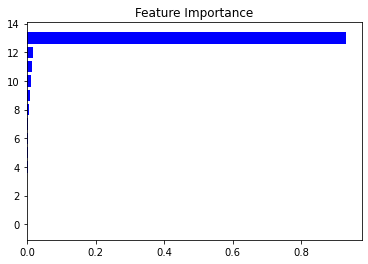

In [25]:
import matplotlib.pyplot as plt 
features = df.columns
importances  = forest.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.ytrick(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:

#pip install ytrick

In [62]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [63]:
# Create XGBoost models for age and gender prediction
model_age = xgb.XGBClassifier()
model_gender = xgb.XGBClassifier()

In [64]:
# Train the models
model_age.fit(X_train, y_age_train)
model_gender.fit(X_train, y_gender_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [65]:
age_predictions = model_age.predict(X_test)
gender_predictions = model_gender.predict(X_test)

In [66]:
age_accuracy = accuracy_score(y_age_test, age_predictions)
gender_accuracy = accuracy_score(y_gender_test, gender_predictions)

In [67]:
# Print the accuracy scores
print("Age Accuracy:", age_accuracy)
print("Gender Accuracy:", gender_accuracy)

Age Accuracy: 1.0
Gender Accuracy: 1.0


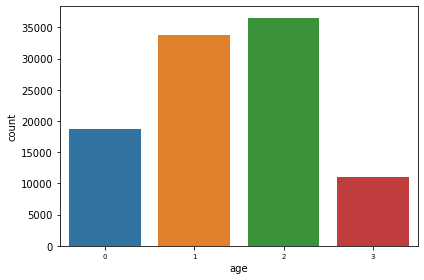

In [68]:
df
ax = sns.countplot(x="age", data=df)

ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
plt.tight_layout()
plt.show()

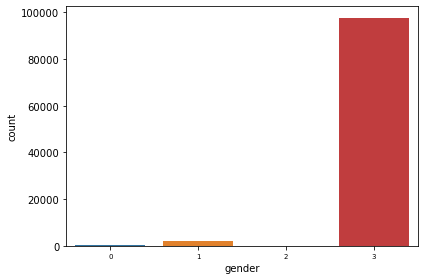

In [69]:
df
ax = sns.countplot(x="gender", data=df)

ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
plt.tight_layout()
plt.show()

In [70]:
df.gender.unique()

array([3, 1, 2, 0])

In [71]:
age_prediction
gender_prediction

array([3, 3, 3, ..., 3, 3, 3])

In [72]:
df['gender'].count()

100000

In [73]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [74]:
# Training the Gradient Boosting Classifier for age prediction
age_classifier = GradientBoostingClassifier()
age_classifier.fit(X_train, y_age_train)

GradientBoostingClassifier()

In [75]:
age_predictions = age_classifier.predict(X_test)

In [76]:
age_accuracy = accuracy_score(y_age_test, age_predictions)

In [77]:
print("Age Accuracy:", age_accuracy)

Age Accuracy: 1.0


In [150]:
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
X, y = make_moons()
calibrated_forest = CalibratedClassifierCV(
    estimator=RandomForestClassifier(n_estimators=10))
param_grid = {
        'estimator__max_depth': [2, 4, 6, 8]}
search = GridSearchCV(calibrated_forest, param_grid, cv=5)
search.fit(X, y)
GridSearchCV(cv=5,
             estimator=CalibratedClassifierCV(...),
             param_grid={'estimator__max_depth': [2, 4, 6, 8]})




GridSearchCV(cv=5, estimator=CalibratedClassifierCV(estimator=Ellipsis),
             param_grid={'estimator__max_depth': [2, 4, 6, 8]})

In [78]:
n_estimetors = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [2,4]
min_samples_split = [2,5]
min_sample_leaf = [1,2]
bootstrap = [True, False]

In [79]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [80]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [81]:
rf_model = RandomForestClassifier()

In [82]:
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf_model, param_grid=param_grid, cv=3, verbose=2, n_jobs = 4)

In [83]:
rf_Grid.fit(X_train, y_age_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


C:\Users\AGL\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
480 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
328 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\AGL\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AGL\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\AGL\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_paramet

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [84]:
rf_Grid.best_params_

{'bootstrap': False,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 10}

In [85]:
print (f'Train Accuracy - : {rf_Grid.score(X_train,y_age_train):.3f}')
print (f'Test Accuracy - : {rf_Grid.score(X_test,y_age_test):.3f}')

Train Accuracy - : 0.898
Test Accuracy - : 0.897


In [86]:
age_prediction



array([2, 3, 1, ..., 2, 3, 2])

In [87]:
#df['age']= age_prediction

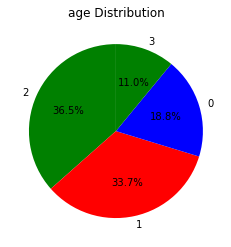

In [88]:
import matplotlib.pyplot as plt

# count the number of reviews with each age
age_counts = df['age'].value_counts()

# create a list of colors for the pie chart
colors = ['green', 'red', 'blue']

# create the pie chart with the age counts
plt.pie(sentiment_counts, labels=age_counts.index, colors=colors, autopct='%1.1f%%', startangle=90)

# add a title to the pie chart
plt.title('age Distribution')

# display the pie chart
plt.show()

In [89]:
df

,age,gender,activity_period,td_os,td_browser,td_language,brand,occupation,source,channels,medium,gender_age,activity_percentile,ad_response_percentile,time
0,2,3,1,2,1,2,15,13,6,3,1,10,75,189,1653983228
1,2,3,1,2,1,2,9,13,6,3,1,10,75,189,1653983228
2,2,3,1,2,1,2,13,13,6,3,1,10,75,189,1653983228
3,2,3,1,2,1,2,11,28,6,3,1,10,77,178,1653983228
4,2,3,1,2,1,2,3,28,6,3,1,10,77,178,1653983228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,3,0,1,0,2,3,28,5,0,11,9,46,151,1653983228
99996,0,3,0,2,1,2,3,2,4,4,19,8,49,148,1653983228
99997,0,3,0,2,1,2,11,2,4,4,19,8,49,148,1653983228
99998,0,3,0,2,1,2,9,2,4,4,19,8,49,148,1653983228
